# ※ 필요한 패키지 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 아래의 전처리부분을 전부 실행하면 daegu.csv 파일이 생성됨
# 파일이 있으면 여기를 실행해서 아래의 EDA를 할 것
df_pre = pd.read_csv('output/daegu_final.csv')

<hr>

# EDA

#### Period
- 2022-05-06 ~ ???

#### Index
0. 기본적인 데이터 탐색

1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
2. 인구밀도가 높은 지역은 상대적으로 열지수가 높다.
3. 지역용도에 따라 열지수의 차이가 나타난다.( 공단,상업,주거,산지,빌딩숲 등)
4. 기저질환 환자가 온열질환 취약계층이다.
5. 대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.
6. 겨울에 추우면 전력 소비량과 온실 가스 배출량이 늘어 여름에 덥다.
7. 교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다. 
8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
10. 나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)

-----

In [3]:
# 라이브러리
import matplotlib
import platform
import matplotlib.ticker as ticker
from scipy.interpolate import interp1d

In [4]:
# 마이너스 부호 출력 오류
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 출력 오류
system_name = platform.system()
if system_name == 'Windows':
    # Windows 운영체제
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    # Mac OS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    # Linux
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

In [5]:
# 복사본으로 작업
EDAset = df_pre.copy()

In [6]:
# 날짜 컬럼 생성
EDAset['date'] = pd.to_datetime(EDAset[['year', 'month', 'day','hour']])

# 8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
- made by MJ

<세부분석>
1. 우천일과 열지수의 관계
    + 연도별 전체 우천일의 수와 최고 열지수
2. 강수량과 열지수의 관계
3. 습도와 기온의 관계
    + 매년 월별 평균 습도와 평균 기온
5. 강수량과 기온의 관계

##### 1. 각 해, 달마다 비가 온 날의 수와 최고 열지수

In [7]:
# 2018년, 효목1동 기준 (대구지방기상청 소재지)
condyear = EDAset['year'] == 2018
condregion = EDAset['region'] == '효목1동'
df2011_HM = EDAset[condyear & condregion]
rainfall = df2011_HM.copy()

In [8]:
# 비 온 날 카운트
count_rain = []
max_HI = []
max_hum = []
month = []


for i in range(1,13) :
    rain_temp = rainfall[rainfall['month'] == i]
    # 비 온 날 카운트 리스트
    cond = rain_temp[rain_temp['rainfall'] > 0.0]
    count_rain.append(cond.count())
    # 최고기온 리스트
    max_HI.append(round(rain_temp['HI'].max(),2))
    # 최고습도 리스트
    max_hum.append(rain_temp['humidity'].mean())
    # 데이터 있는 달 리스트
    month.append(i)

# 출력
counts_rain = [i[0] for i in count_rain]

print("측정달", month)
print("우천 발생수 (시간당)", counts_rain)
print("최고 열지수", max_HI)
print("최고 습도", max_hum)

측정달 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
우천 발생수 (시간당) [48, 23, 102, 80, 93, 84, 61, 66, 57, 40, 16, 23]
최고 열지수 [11.34, 12.83, 24.69, 29.01, 33.04, 34.63, 41.33, 40.7, 29.67, 24.82, 19.27, 15.14]
최고 습도 [51.51075268817204, 43.017857142857146, 62.89650537634409, 57.10138888888889, 66.18279569892474, 64.0513888888889, 66.24193548387096, 67.71370967741936, 70.33888888888889, 63.211021505376344, 62.458333333333336, 50.211021505376344]


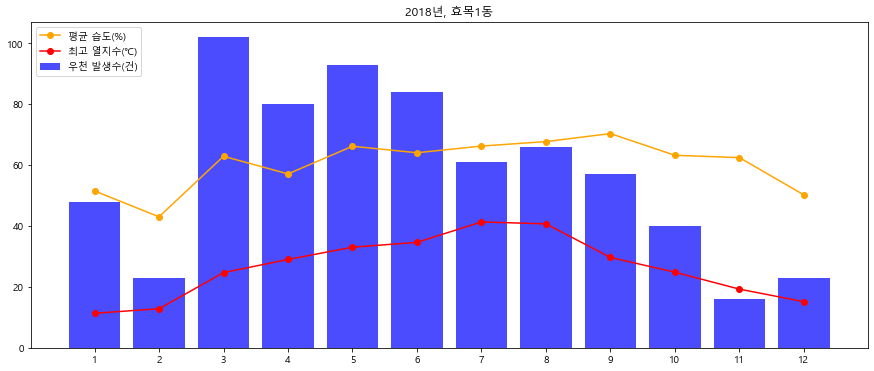

In [9]:
# 시각화
plt.figure(figsize=(15,6))
plt.title('2018년, 효목1동')

plt.plot(month, max_hum, color='orange', marker = 'o', label='평균 습도(%)', linestyle='-')
plt.bar(month, counts_rain, color='blue', label='우천 발생수(건)', alpha=0.7)
plt.plot(month, max_HI, color='red', marker = 'o', label='최고 열지수(℃)', linestyle='-')

plt.legend(loc=2)
plt.xticks(month)
plt.show()

<전체 년도 결과>
* 최고 열지수는 7, 8월경에 최고치를 기록
* 2018년 3월경 강수일이 급증하자 열지수의 증가폭 역시 다른 해에 비해 높음
* 열지수가 최고를 기록한 달 혹은 그 다음 달에 우천일 증가하는 경향
* 열지수가 최고를 기록한 달의 평균습도는 큰 변화가 없음
-> 오히려 우천 발생수에 의존

In [10]:
df_sum = pd.DataFrame(data = list(zip(max_hum, counts_rain, max_HI)), columns = ['max hum', 'counts rain', 'max HI'])

C:\Users\User\AppData\Local\Temp\ipykernel_4632\1923441360.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


<AxesSubplot:>

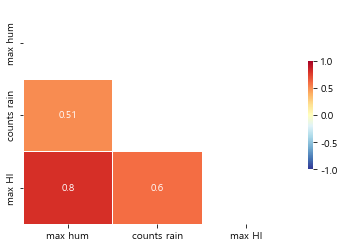

In [11]:
df_corr = df_sum.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # 삼각형으로 표시

sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  

* 장마기간 외 비가 많이 온 2014년, 가뭄이 심각했던 2016년, 적은 강수일에 비해 강수량이 컸던 2018년, 태풍의 영향을 많이 받았던 2019년을 대상으로 히트맵을 그린 결과
* 최대 열지수와 강수일은 양의 상관관계를 크게 보임
* 2016년 히트맵도 참고하면 열지수와 습도는 관계가 모순되므로 두 변수는 관계가 없음

In [12]:
# 전체 데이터, 연도별 우천일 수
rainset = EDAset.copy()
RS = rainset.groupby('year')['rainfall'].nunique().reset_index()
RS

,year,rainfall
0,2010,51
1,2011,42
2,2012,43
3,2013,48
4,2014,39
5,2015,22
6,2016,180
7,2017,161
8,2018,157
9,2019,52


In [13]:
# 연도별 최대 열지수
setmax_HI = []
year = []

for i in range(2010,2023) :
    HI_temp = EDAset[EDAset['year'] == i]
    # 평균 최대 열지수 리스트
    setmax_HI.append(round(HI_temp['HI'].mean(),2))
    # 데이터 있는 연도 리스트
    year.append(i)

# 출력
print("측정연도", year)
print("평균 최대 열지수", setmax_HI)

측정연도 [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
평균 최대 열지수 [18.68, 13.75, 13.3, 14.34, 14.08, 14.02, 14.3, 14.02, 14.1, 14.59, 14.39, 14.53, 6.37]


In [14]:
maxHI = pd.DataFrame(data = list(zip(setmax_HI, year)), columns = ['max HI', 'year'])

<AxesSubplot:ylabel='열지수 (℃)'>

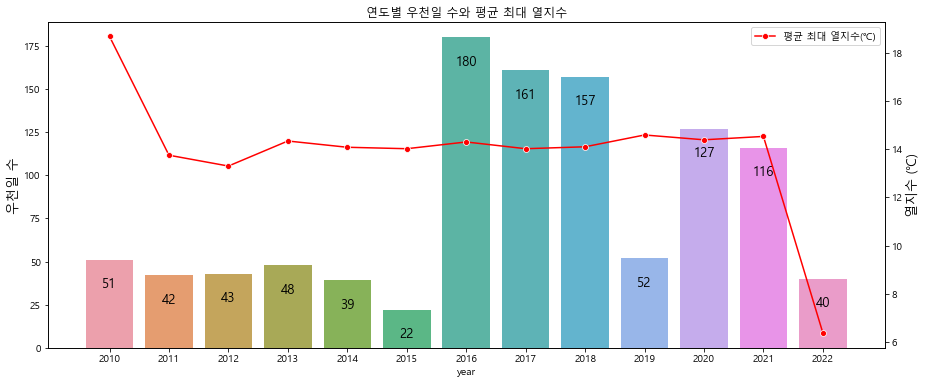

In [15]:
ax1 = sns.set_style(style=None, rc=None)

fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title("연도별 우천일 수와 평균 최대 열지수")
sns.barplot(
    data = RS,
    x = "year",
    y = "rainfall",
    alpha=0.9,
    ax=ax1)

for p in ax1.patches:
    ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 20),
    ha='center', va='center', fontsize=13, color='black', xytext=(0,10),
    textcoords='offset points')
ax1.set_ylabel("우천일 수", fontsize=13)

ax2 = ax1.twinx()
ax2.set_ylabel("열지수 (℃)", fontsize=13)
sns.lineplot(
    data = maxHI['max HI'],
    marker='o',
    sort = False,
    color='red',
    label='평균 최대 열지수(℃)',
    ax=ax2)

- 데이터가 충분하지 않은 2010년과 2022년은 제외함.
- 평균 최대열지수는 대체로 비슷한 경향을 보이나 그에 반해 우천일 수는 해마다 다양하며 2016~2018년이 이례적으로 급증했다.

<관련 기사>
- (대한뉴스) 2015년은 장마기간에 강수량이 적었다.
- (동아일보) 2016년은 전체적으로 가뭄이 심각한 해다.
- (중앙일보) 2019년은 기상관측 이래 태풍의 영향을 가장 많이 받은 해로, 폭염일수는 적으나 월 평균 기온이 높았다. 또한 겨울에는 눈이 적었다.

##### 2. 매년 일일 평균 강수량 + 열지수

In [16]:
# 효목1동 기준
HMdong = EDAset[condregion]
rainheat = HMdong.copy()

In [17]:
# 데이터가 적은 2010년, 2022년은 제외하고 필요한 컬럼만 선택
cond1 = rainheat[rainheat['year'] == 2010].index
cond2 = rainheat[rainheat['year'] == 2022].index
rainheat.drop(cond1, inplace=True)
rainheat.drop(cond2, inplace=True)

In [18]:
rainheat = rainheat.reset_index()

In [19]:
RH = rainheat[['datetime','year','month','day','rainfall','HI']]
RH

,datetime,year,month,day,rainfall,HI
0,2011-01-01 00:00:00,2011,1,1,0.0,-5.7
1,2011-01-01 01:00:00,2011,1,1,0.0,-4.6
2,2011-01-01 02:00:00,2011,1,1,0.0,-2.5
3,2011-01-01 03:00:00,2011,1,1,0.0,-0.8
4,2011-01-01 04:00:00,2011,1,1,0.0,0.1
...,...,...,...,...,...,...
96427,2021-12-31 19:00:00,2021,12,31,0.0,-5.9
96428,2021-12-31 20:00:00,2021,12,31,0.0,-8.4
96429,2021-12-31 21:00:00,2021,12,31,0.0,-8.3
96430,2021-12-31 22:00:00,2021,12,31,0.0,-7.7


In [22]:
# 일별 평균 강수량과 열지수를 계산한 데이터프레임을 생성
dfRH = RH.groupby(['year','month','day'], as_index=False).mean()
dfRH


,year,month,day,rainfall,HI
0,2011,1,1,0.0,-2.025000
1,2011,1,2,0.0,-0.602755
2,2011,1,3,0.0,-0.654167
3,2011,1,4,0.0,-0.820833
4,2011,1,5,0.0,-0.420833
...,...,...,...,...,...
4013,2021,12,27,0.0,0.016667
4014,2021,12,28,0.0,1.455093
4015,2021,12,29,0.0,3.362431
4016,2021,12,30,0.0,-0.725000


In [23]:
dfRH.describe()

,year,month,day,rainfall,HI
count,4018.00000,4018.000000,4018.000000,4018.000000,4018.000000
mean,2016.00000,6.522648,15.730463,0.127242,14.226217
std,3.16275,3.449210,8.801536,0.453603,10.479638
min,2011.00000,1.000000,1.000000,0.000000,-10.779167
25%,2013.00000,4.000000,8.000000,0.000000,4.702980
50%,2016.00000,7.000000,16.000000,0.000000,14.405035
75%,2019.00000,10.000000,23.000000,0.003125,22.843785
max,2021.00000,12.000000,31.000000,8.333333,39.222891


c:\github\Team_Project\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


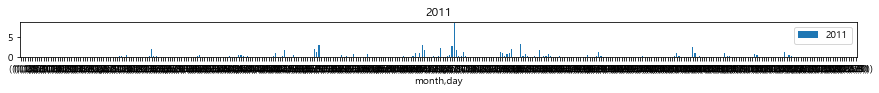

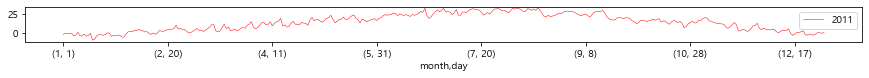

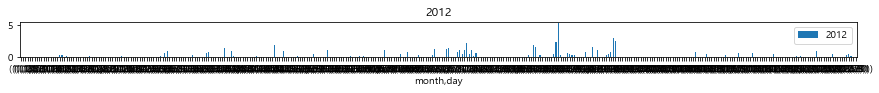

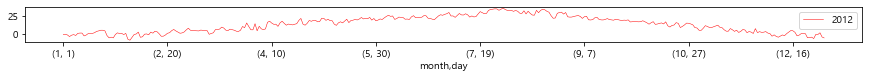

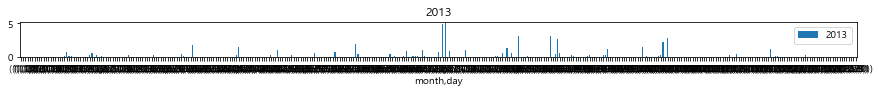

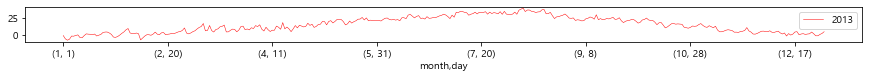

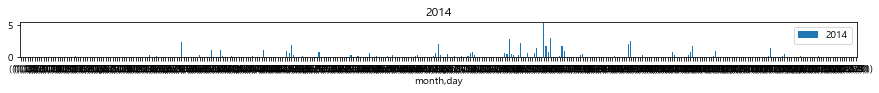

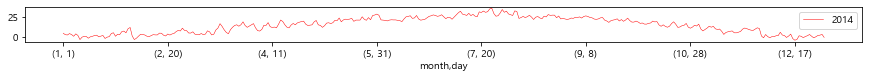

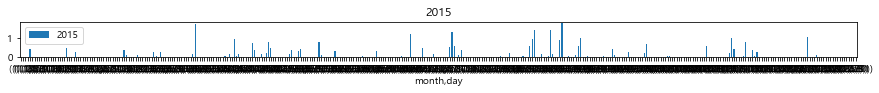

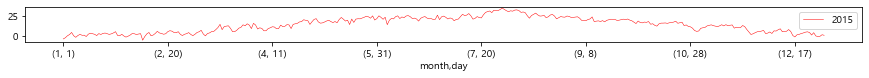

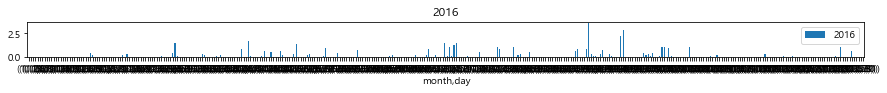

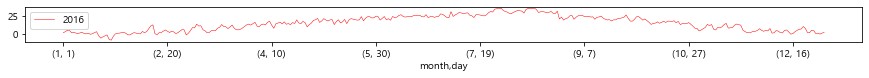

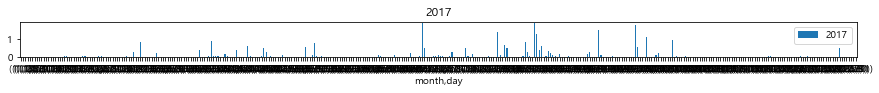

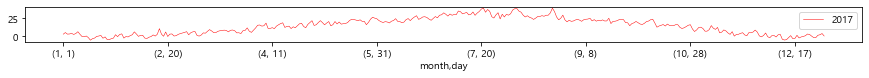

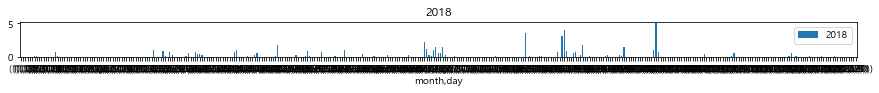

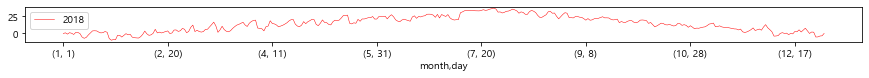

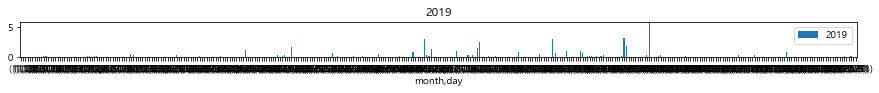

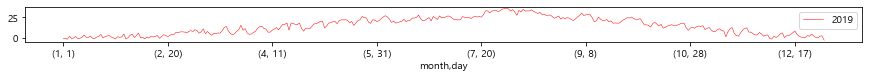

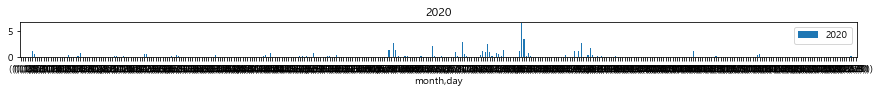

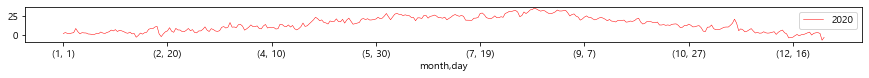

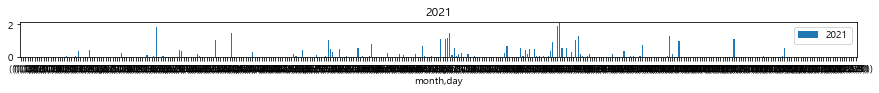

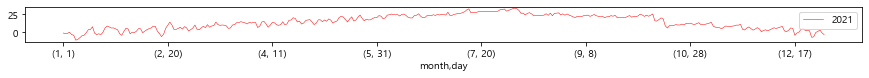

In [21]:
# 연도별 일일 평균 강수량과 평균 열지수
for i in range(2011,2022):
    temp_mean = dfRH.query('year == {0}'.format(i))

    x = temp_mean.query('day >= 1')
    y = temp_mean['rainfall']
    z = temp_mean['HI']

    
    temp_mean.unstack(level=0)['rainfall'].plot(
        kind='bar',
        subplots=True,
        rot=0,
        figsize=(15,10),
        layout=(13,1)
        )

    temp_mean.unstack(level=0)['HI'].plot(
        kind='line',
        subplots=True,
        rot=0,
        figsize=(15,10),
        layout=(13,1),
        color='red',
        linewidth=0.5
        )


- 매년 강수량과 열지수가 유사한 증감패턴을 보인다
- 열지수와 강수량은 연관이 있다

<예시>
- 2018년, 열지수가 급증하여 유지되고, 여름보다 가을에 우천일이 치우쳐 있으며 강수량이 컸다
-- 장마일과 강수일수가 적은 것에 비해 합계 강수량이 다른 해와 비교하여 평균이었으므로 강수일이 적으나 올 때마다 비가 꽤 내렸다는 분석결과와 맞음
- 2021년, 가을까지 열지수가 높았고, 여름부터 가을까지 강수량은 적었지만 거의 매일 비가 왔었다
-- 2021년은 지각장마가 왔었고, 장마철 외에도 비가 많이 왔다는 기록이 있다

#### 3. 습도+기온 상관관계 그래프

In [22]:
# 효목1동 기준
df2011 = EDAset[condregion]
humheat = df2011.copy()

In [23]:
humheat = humheat[['humidity','temp','HI','date']]

corr = humheat.corr()
print(corr)

          humidity      temp        HI
humidity  1.000000  0.138106  0.172603
temp      0.138106  1.000000  0.993401
HI        0.172603  0.993401  1.000000


- 삼각형 상관관계 그래프

C:\Users\User\AppData\Local\Temp\ipykernel_13572\3424830007.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


<AxesSubplot:>

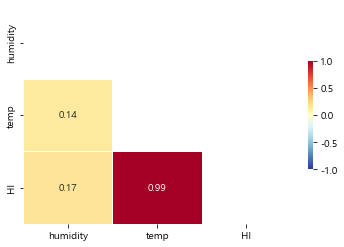

In [24]:
df_corr = humheat.corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # 삼각형으로 표시

sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  

- 열지수는 습도보다 기온과 상관성이 높다.
- 습도와 기온은 관련이 적다.
- 습도가 우천발생의 지표가 되지 못하므로 열지수에 영향을 주는 요인으로 파악하기 어렵다.

In [25]:
humetemp = humheat[['humidity','temp','HI','date']]

In [26]:
humetemp

,humidity,temp,HI,date
2088960,53.0,16.8,15.919444,2010-06-01 00:00:00
2088961,50.0,17.9,17.051111,2010-06-01 01:00:00
2088962,47.0,19.5,18.732778,2010-06-01 02:00:00
2088963,40.0,20.9,20.090000,2010-06-01 03:00:00
2088964,41.0,20.9,20.116111,2010-06-01 04:00:00
...,...,...,...,...
2193403,63.0,10.8,9.580556,2022-04-30 19:00:00
2193404,66.0,10.5,9.328889,2022-04-30 20:00:00
2193405,60.0,12.0,10.822222,2022-04-30 21:00:00
2193406,50.0,13.1,11.771111,2022-04-30 22:00:00


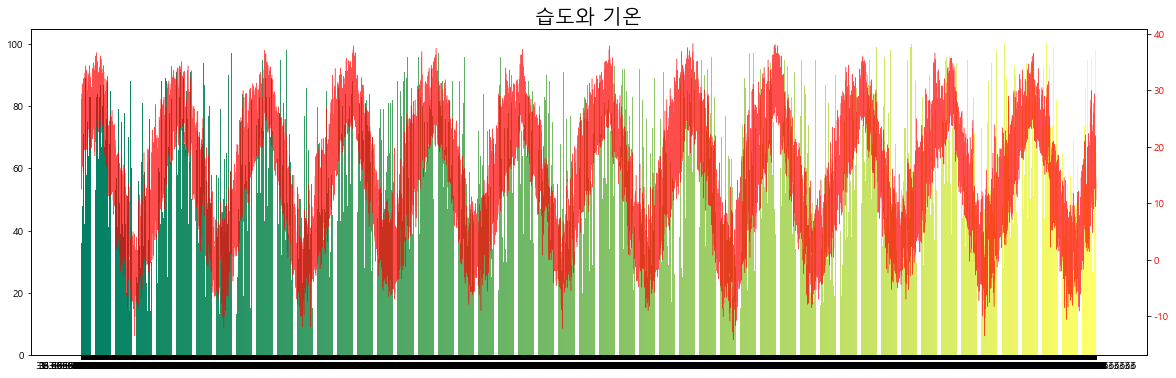

In [34]:
fig = plt.figure(figsize=(20,6))
fig.set_facecolor('white')
ax1 = fig.add_subplot()

colors = sns.color_palette('summer', len(humetemp["date"])) ## 바 차트 색상
xtick_label_position = list(range(len(humetemp["date"]))) ## x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) ## x축 눈금 
ax1.set_xticklabels(humetemp["humidity"]) ## x축 눈금 라벨
ax1.bar(xtick_label_position, humetemp["humidity"], color=colors) ## 바차트 출력

color = 'red'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, humetemp["temp"], color=color, linestyle='-', linewidth = 0.5, alpha = 0.7) ## 선 그래프 
ax2.tick_params(axis='y', labelcolor=color) ## 눈금 라벨 색상 지정

plt.title('습도와 기온', fontsize=20)
plt.show()

- 전체적으로 습도의 증가 주기와 기온의 증가 주기가 일치한다.

#### 4. 년도별 매달 평균 습도 + 평균 기온

In [35]:
# 동인동 기준
df2011 = EDAset[condregion]
humheat = df2011.copy()

In [36]:
# 데이터가 적은 2010년, 2022년은 제외하고 필요한 컬럼만 선택
cond1 = humheat[humheat['year'] == 2010].index
cond2 = humheat[humheat['year'] == 2022].index
humheat.drop(cond1, inplace=True)
humheat.drop(cond2, inplace=True)

In [37]:
humheat = humheat.reset_index()

In [38]:
HH = humheat[['datetime','year','month','day','humidity','temp']]

In [39]:
dfHH = HH.groupby(['year','month']).mean()

c:\github\Team_Project\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


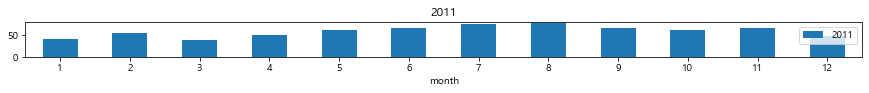

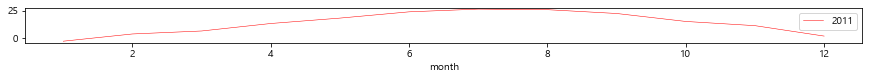

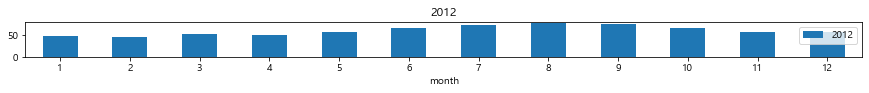

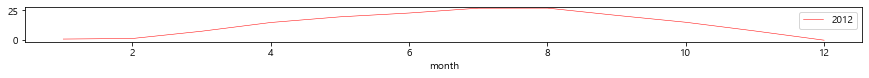

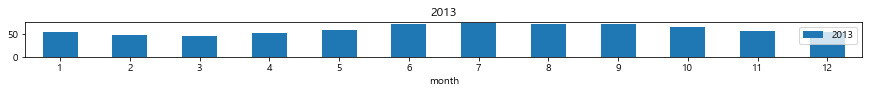

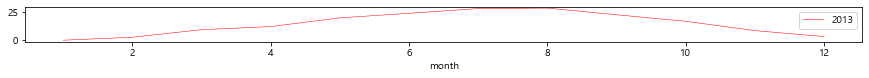

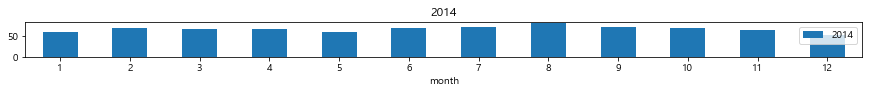

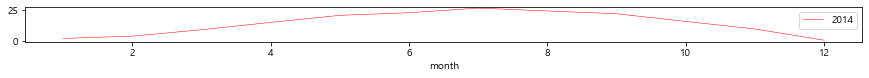

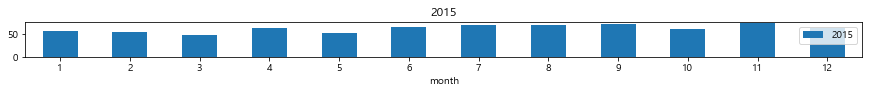

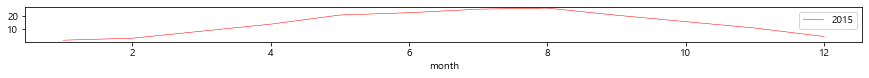

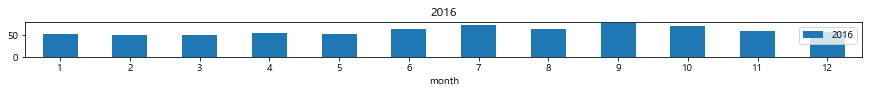

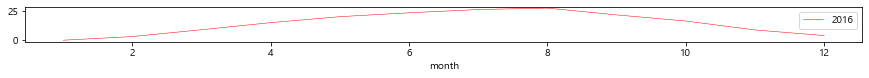

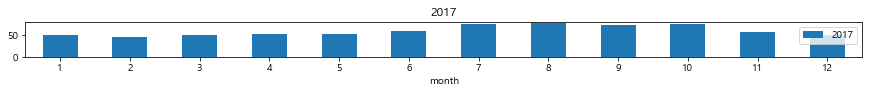

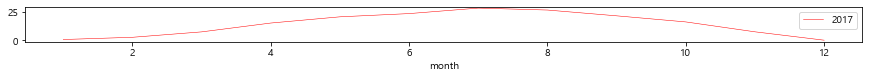

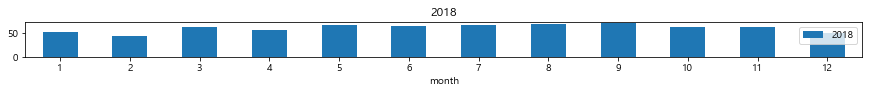

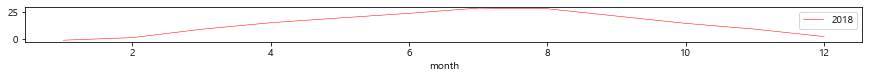

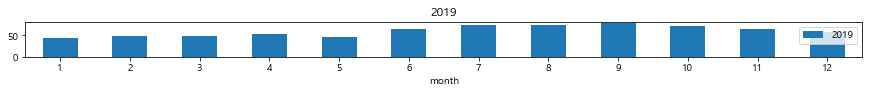

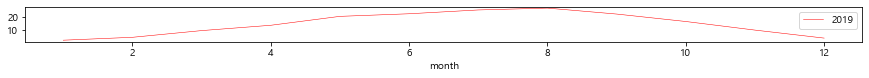

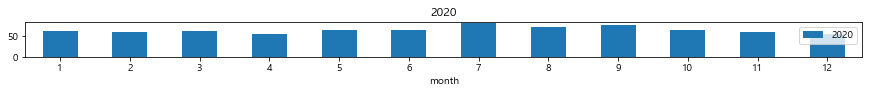

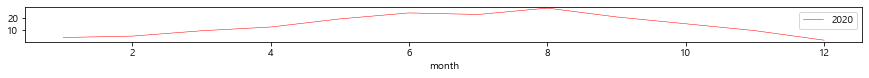

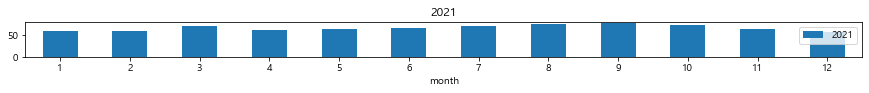

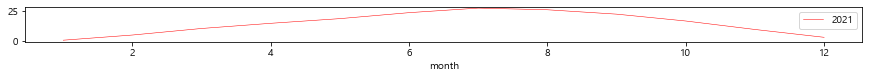

In [161]:
# 연도별 월 평균 습도와 평균 기온

for i in range(2011,2022):
    temp_mean = dfHH.query('year == {0}'.format(i))

    x = temp_mean.query('month >= 1')
    y = temp_mean['humidity']
    z = temp_mean['temp']

    
    fig = temp_mean.unstack(level=0)['humidity'].plot(
        kind='bar',
        subplots=True,
        rot=0,
        figsize=(15,10),
        layout=(13,1)
        )
    
    plt.savefig('hum{0}.png'.format(i), dpi=300)

    fig = temp_mean.unstack(level=0)['temp'].plot(
        kind='line',
        subplots=True,
        rot=0,
        figsize=(15,10),
        layout=(13,1),
        color='red',
        linewidth=0.5
        )
    
    plt.savefig('temp{0}.png'.format(i), dpi=300)


- 기온이 1개월 가량 우선적으로 증가한 후 습도가 증가하는 경향이 있다.

#### 5. 모든 달의 평균 강수량 + 평균 기온

In [ ]:
# 평균계산
temp = []
humd = []
month = []

for i in range(1,13) :
    humd_high = EDAset[EDAset['date'].dt.month == i]

    #최고기온 평균
    temp.append(round(humd_high['temp'].mean(),1))

    #강수량 평균
    humd.append(round(humd_high['humidity'].mean(),1))

    month.append(i)

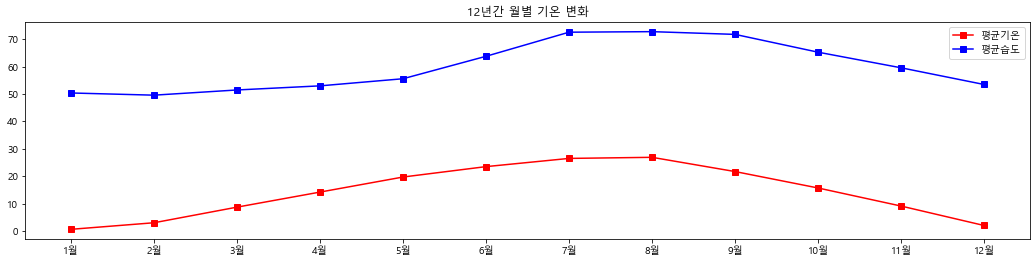

In [ ]:
# 그래프 그리기
x_axis = EDAset['date'].dt.month.unique()

labels = []
for i in range(1,13):
    labels.append(str(i)+'월')

plt. figure(figsize=(18,4))

plt.title('12년간 월 변화')
plt.plot(month, temp, color='red', marker = 's', label='평균기온', linestyle='-')
plt.plot(month, humd, color='blue', marker = 's', label='평균습도', linestyle='-')
plt.legend(loc='best')
plt.xticks(month,labels)
plt.show()

- 대체로 평균 강수량의 증가와 평균 기온의 증가 추세가 일치한다.

# 9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
- made by MJ

In [12]:
# 미세먼지 데이터 불러오기
orig = pd.read_csv('./dataset/airpollution_daegu.csv', encoding='cp949')
orig

,지점,지점명,일시,1시간평균 미세먼지농도(㎍/㎥)
0,143,대구,2010-06-01 0:00,9.5
1,143,대구,2010-06-01 1:00,12.0
2,143,대구,2010-06-01 2:00,9.0
3,143,대구,2010-06-01 3:00,8.0
4,143,대구,2010-06-01 4:00,6.0
...,...,...,...,...
99569,143,대구,2022-04-30 19:00,23.0
99570,143,대구,2022-04-30 20:00,18.0
99571,143,대구,2022-04-30 21:00,18.0
99572,143,대구,2022-04-30 22:00,15.0


- 전처리

In [13]:
# 분석용 데이터셋으로 정리
df_airpoll = orig.iloc[:,2:]
df_airpoll.columns = ['date','concentration']
df_airpoll

,date,concentration
0,2010-06-01 0:00,9.5
1,2010-06-01 1:00,12.0
2,2010-06-01 2:00,9.0
3,2010-06-01 3:00,8.0
4,2010-06-01 4:00,6.0
...,...,...
99569,2022-04-30 19:00,23.0
99570,2022-04-30 20:00,18.0
99571,2022-04-30 21:00,18.0
99572,2022-04-30 22:00,15.0


In [14]:
# date 컬럼의 자료형을 알맞게 변환
df_airpoll['date'] = df_airpoll['date'].astype(str)
df_airpoll['date'] = pd.to_datetime(df_airpoll['date'])

In [15]:
df_airpoll

,date,concentration
0,2010-06-01 00:00:00,9.5
1,2010-06-01 01:00:00,12.0
2,2010-06-01 02:00:00,9.0
3,2010-06-01 03:00:00,8.0
4,2010-06-01 04:00:00,6.0
...,...,...
99569,2022-04-30 19:00:00,23.0
99570,2022-04-30 20:00:00,18.0
99571,2022-04-30 21:00:00,18.0
99572,2022-04-30 22:00:00,15.0


In [16]:
# date 컬럼을 각 요소로 나누기
df_airpoll['year'] = df_airpoll['date'].dt.year
df_airpoll[ 'month'] = df_airpoll['date'].dt.month
df_airpoll['day'] = df_airpoll['date'].dt.day
df_airpoll['hour'] = df_airpoll['date'].dt.hour

In [17]:
df_airpoll

,date,concentration,year,month,day,hour
0,2010-06-01 00:00:00,9.5,2010,6,1,0
1,2010-06-01 01:00:00,12.0,2010,6,1,1
2,2010-06-01 02:00:00,9.0,2010,6,1,2
3,2010-06-01 03:00:00,8.0,2010,6,1,3
4,2010-06-01 04:00:00,6.0,2010,6,1,4
...,...,...,...,...,...,...
99569,2022-04-30 19:00:00,23.0,2022,4,30,19
99570,2022-04-30 20:00:00,18.0,2022,4,30,20
99571,2022-04-30 21:00:00,18.0,2022,4,30,21
99572,2022-04-30 22:00:00,15.0,2022,4,30,22


In [18]:
# 복사본으로 작업
airpoll = df_airpoll[['date','year','month','day','hour','concentration']]

In [19]:
airpoll

,date,year,month,day,hour,concentration
0,2010-06-01 00:00:00,2010,6,1,0,9.5
1,2010-06-01 01:00:00,2010,6,1,1,12.0
2,2010-06-01 02:00:00,2010,6,1,2,9.0
3,2010-06-01 03:00:00,2010,6,1,3,8.0
4,2010-06-01 04:00:00,2010,6,1,4,6.0
...,...,...,...,...,...,...
99569,2022-04-30 19:00:00,2022,4,30,19,23.0
99570,2022-04-30 20:00:00,2022,4,30,20,18.0
99571,2022-04-30 21:00:00,2022,4,30,21,18.0
99572,2022-04-30 22:00:00,2022,4,30,22,15.0


In [22]:
airpoll.to_csv('C:/Download/airpollution_final.csv', encoding='cp949')

In [78]:
daegu_final = df_pre.copy()

    1. 필요한 컬럼만 가져오기 - date, year, month, day, hour, temp
    2. 미세먼지 데이터와 조인하기
    3. 그래프 그리기

In [79]:
# 미세먼지를 측정한 대구지방기상청의 소재지 (효목1동) 데이터만 선택
hmd = EDAset[condregion].reset_index()

In [80]:
hmd

,index,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI,date
0,2088960,2010,6,1,0,2010-06-01 00:00:00,16.8,0.0,-1,53.0,NaN,NaN,1,효목1동,15.919444,61.14396,2010-06-01 00:00:00
1,2088961,2010,6,1,1,2010-06-01 01:00:00,17.9,0.0,-1,50.0,NaN,NaN,1,효목1동,17.051111,62.50950,2010-06-01 01:00:00
2,2088962,2010,6,1,2,2010-06-01 02:00:00,19.5,0.0,-1,47.0,NaN,NaN,1,효목1동,18.732778,64.44735,2010-06-01 02:00:00
3,2088963,2010,6,1,3,2010-06-01 03:00:00,20.9,0.0,-1,40.0,NaN,NaN,1,효목1동,20.090000,65.78540,2010-06-01 03:00:00
4,2088964,2010,6,1,4,2010-06-01 04:00:00,20.9,0.0,-1,41.0,NaN,NaN,2,효목1동,20.116111,65.84931,2010-06-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104443,2193403,2022,4,30,19,2022-04-30 19:00:00,10.8,0.0,-1,63.0,2.0,313.0,-1,효목1동,9.580556,52.77496,2022-04-30 19:00:00
104444,2193404,2022,4,30,20,2022-04-30 20:00:00,10.5,0.0,-1,66.0,1.5,337.0,-1,효목1동,9.328889,52.22770,2022-04-30 20:00:00
104445,2193405,2022,4,30,21,2022-04-30 21:00:00,12.0,0.0,-1,60.0,1.4,302.0,-1,효목1동,10.822222,54.56800,2022-04-30 21:00:00
104446,2193406,2022,4,30,22,2022-04-30 22:00:00,13.1,0.0,-1,50.0,2.3,286.0,-1,효목1동,11.771111,56.24550,2022-04-30 22:00:00


In [81]:
airset = hmd[['date','year','month','day','hour','temp']]

In [82]:
# 조인을 위해 date 컬럼 생성
airset['date'] = pd.to_datetime(airset[['year', 'month', 'day','hour']])
airset

C:\Users\User\AppData\Local\Temp\ipykernel_13572\552878553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airset['date'] = pd.to_datetime(airset[['year', 'month', 'day','hour']])


,date,year,month,day,hour,temp
0,2010-06-01 00:00:00,2010,6,1,0,16.8
1,2010-06-01 01:00:00,2010,6,1,1,17.9
2,2010-06-01 02:00:00,2010,6,1,2,19.5
3,2010-06-01 03:00:00,2010,6,1,3,20.9
4,2010-06-01 04:00:00,2010,6,1,4,20.9
...,...,...,...,...,...,...
104443,2022-04-30 19:00:00,2022,4,30,19,10.8
104444,2022-04-30 20:00:00,2022,4,30,20,10.5
104445,2022-04-30 21:00:00,2022,4,30,21,12.0
104446,2022-04-30 22:00:00,2022,4,30,22,13.1


In [93]:
# date 컬럼을 기준으로 조인하기
pollset = pd.merge(airset, airpoll, left_on=['year','month','day','hour','date'], right_on = ['year','month','day','hour','date'], how='outer')

In [94]:
pollset

,date,year,month,day,hour,temp,concentration
0,2010-06-01 00:00:00,2010,6,1,0,16.8,9.5
1,2010-06-01 01:00:00,2010,6,1,1,17.9,12.0
2,2010-06-01 02:00:00,2010,6,1,2,19.5,9.0
3,2010-06-01 03:00:00,2010,6,1,3,20.9,8.0
4,2010-06-01 04:00:00,2010,6,1,4,20.9,6.0
...,...,...,...,...,...,...,...
104443,2022-04-30 19:00:00,2022,4,30,19,10.8,23.0
104444,2022-04-30 20:00:00,2022,4,30,20,10.5,18.0
104445,2022-04-30 21:00:00,2022,4,30,21,12.0,18.0
104446,2022-04-30 22:00:00,2022,4,30,22,13.1,15.0


In [141]:
# 이미 결측치가 처리된 미세먼지 데이터에 반해 airset 데이터는 결측치 처리가 되지 않음
pollset['concentration'].isna().sum()


4874

In [142]:
# 결측치를 3차다항식으로 보간해줌
interpoll = pollset.copy()
interpoll['concentration'] = interpoll['concentration'].interpolate(method='polynomial', limit_direction='both', order=3, limit=10)

In [143]:
interpoll['concentration'].isna().sum()

758

In [156]:
# 특정연도만 선택
test = interpoll[interpoll['year']==2014]

In [157]:
test.reset_index()

,index,date,year,month,day,hour,temp,concentration
0,31440,2014-01-01 00:00:00,2014,1,1,0,3.7,82.0
1,31441,2014-01-01 01:00:00,2014,1,1,1,5.7,84.0
2,31442,2014-01-01 02:00:00,2014,1,1,2,7.9,84.0
3,31443,2014-01-01 03:00:00,2014,1,1,3,8.7,93.0
4,31444,2014-01-01 04:00:00,2014,1,1,4,9.9,104.0
...,...,...,...,...,...,...,...,...
8755,40195,2014-12-31 19:00:00,2014,12,31,19,-5.2,16.0
8756,40196,2014-12-31 20:00:00,2014,12,31,20,-5.6,13.0
8757,40197,2014-12-31 21:00:00,2014,12,31,21,-2.4,14.0
8758,40198,2014-12-31 22:00:00,2014,12,31,22,-3.3,19.0


In [158]:
# 연도별 최대 열지수
concen_mean = []
month_mean = []
HI_mean = []

for i in range(1,13) :
    AP_temp = test[test['month'] == i]
    # 평균 미세먼지 농도 리스트
    concen_mean.append(round(AP_temp['concentration'].mean(),2))
    # 최고 기온 리스트
    HI_mean.append(round(AP_temp['temp'].max(),2))
    # 데이터 있는 달 리스트
    month_mean.append(i)

# 출력
print("측정 월", month_mean)
print("평균 미세먼지 농도", concen_mean)
print("최고 기온", HI_mean)

측정 월 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
평균 미세먼지 농도 [50.53, 40.6, 39.78, 42.49, 52.16, 33.14, 29.6, 22.78, 25.8, 29.29, 37.6, 36.91]
최고 기온 [13.7, 19.8, 25.8, 28.1, 36.9, 33.3, 37.5, 33.5, 31.9, 25.1, 20.1, 11.2]


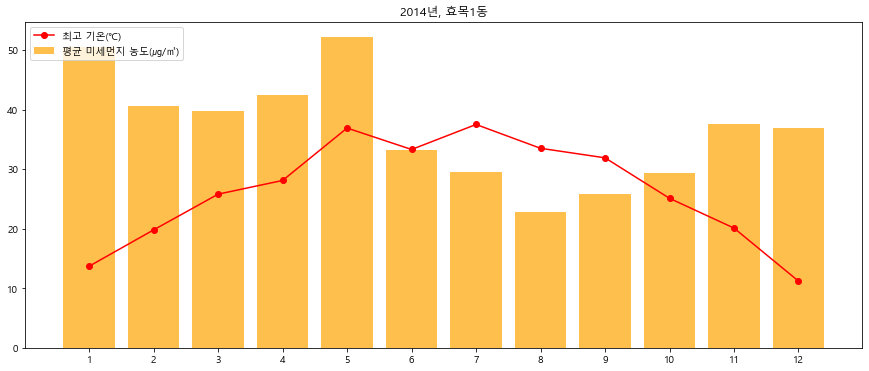

In [159]:
# 시각화
plt.figure(figsize=(15,6))
plt.title('2014년, 효목1동')

plt.bar(month_mean, concen_mean, color='orange', label='평균 미세먼지 농도(㎍/㎥)', alpha=0.7)
plt.plot(month_mean, HI_mean, color='red', marker = 'o', label='최고 기온(℃)', linestyle='-')

plt.legend(loc=2)
plt.xticks(month)
plt.show()

- 그래프 상, 미세먼지와 기온은 반비례 관계로 나타난다.
- 여름에 폭우 영향으로 미세먼지의 농도가 낮아지는 필연적인 현상으로 해석된다.

Text(0, 0.5, '미세먼지')

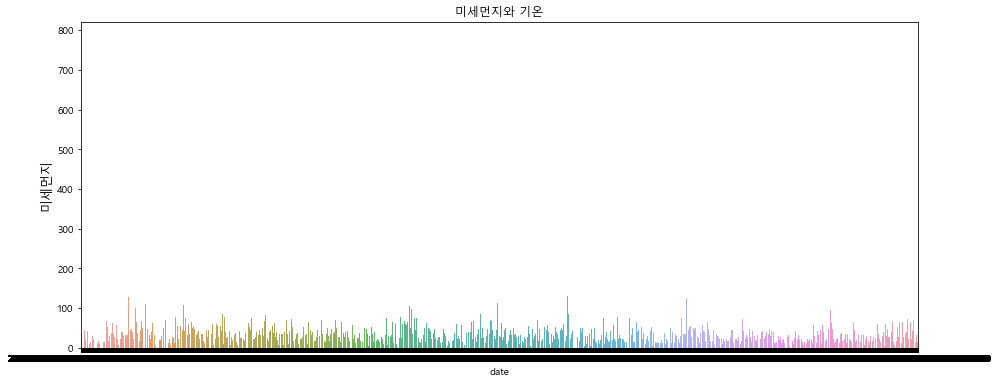

In [95]:
'''ax1 = sns.set_style(style=None, rc=None)
#fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title("미세먼지와 기온")
sns.barplot(data = pollset,x ="date", y= "concentration",alpha=0.9,ax=ax1)
ax1.set_ylabel("미세먼지", fontsize=13)'''

----
# 4. 새 가설 : 북서풍일때 열지수가 높다

In [7]:
# 미세먼지를 측정한 대구지방기상청의 소재지인 효목1동 기준으로 데이터를 선택
condregion = EDAset['region'] == '효목1동'
dfHM = EDAset[condregion]

In [8]:
# 2010년 6월~ 12월 6일까지의 풍향데이터가 없는 것을 확인
wd = dfHM[dfHM['wind_direction'].isna()]
wd.tail()

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI,date
2093474,2010,12,6,2,2010-12-06 02:00:00,7.3,0.0,-1,66.0,NaN,NaN,4,효목1동,5.808889,47.54482,2010-12-06 02:00:00
2093475,2010,12,6,3,2010-12-06 03:00:00,9.3,0.0,-1,57.0,NaN,NaN,2,효목1동,7.773889,50.92999,2010-12-06 03:00:00
2093476,2010,12,6,4,2010-12-06 04:00:00,11.7,0.0,-1,52.0,NaN,NaN,3,효목1동,10.283333,54.36416,2010-12-06 04:00:00
2093477,2010,12,6,5,2010-12-06 05:00:00,12.6,0.0,-1,48.0,NaN,NaN,3,효목1동,11.168889,55.62952,2010-12-06 05:00:00
2093478,2010,12,6,6,2010-12-06 06:00:00,12.8,0.0,-1,38.0,NaN,NaN,3,효목1동,11.127778,56.04936,2010-12-06 06:00:00


In [9]:
# 결측치가 존재하는 데이터를 삭제하고 인덱스를 리셋함
noWD = wd.index
pre_wdset = dfHM.drop(index=noWD).reset_index()
pre_wdset.head()

,index,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI,date
0,2093479,2010,12,6,7,2010-12-06 07:00:00,11.7,0.0,-1,31.0,3.7,319.0,3,효목1동,9.735000,54.93473,2010-12-06 07:00:00
1,2093480,2010,12,6,8,2010-12-06 08:00:00,10.0,0.0,-1,35.0,3.1,306.0,3,효목1동,7.969444,52.86000,2010-12-06 08:00:00
2,2093481,2010,12,6,9,2010-12-06 09:00:00,9.0,0.0,-1,38.0,3.1,335.0,3,효목1동,6.947778,51.54180,2010-12-06 09:00:00
3,2093482,2010,12,6,10,2010-12-06 10:00:00,7.2,0.0,-1,36.0,3.5,320.0,4,효목1동,4.915556,49.55008,2010-12-06 10:00:00
4,2093483,2010,12,6,11,2010-12-06 11:00:00,5.1,0.0,-1,45.0,2.2,300.0,2,효목1동,2.840556,46.26805,2010-12-06 11:00:00


In [10]:
# 풍향의 범위를 설정하기 위해 데이터 타입을 확인
pre_wdset['wind_direction'].dtypes

dtype('float64')

In [11]:
# 북서풍의 기준을 서북서 (292.5°) ~ 북북서 (337.5°)로 설정하고 데이터프레임으로 저장
cond3 = (pre_wdset['wind_direction'] <= 337.5) & (pre_wdset['wind_direction'] >= 292.5)
NWset = pre_wdset.loc[cond3,:]
NWset.head(3)

,index,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI,date
0,2093479,2010,12,6,7,2010-12-06 07:00:00,11.7,0.0,-1,31.0,3.7,319.0,3,효목1동,9.735000,54.93473,2010-12-06 07:00:00
1,2093480,2010,12,6,8,2010-12-06 08:00:00,10.0,0.0,-1,35.0,3.1,306.0,3,효목1동,7.969444,52.86000,2010-12-06 08:00:00
2,2093481,2010,12,6,9,2010-12-06 09:00:00,9.0,0.0,-1,38.0,3.1,335.0,3,효목1동,6.947778,51.54180,2010-12-06 09:00:00


In [12]:
# 폭염에 영향을 끼치는 6~9월로 날짜 범위를 제한함
cond4 = (NWset['month'] <= 9) & (NWset['month'] >= 6)
NW = NWset.loc[cond4,:]

In [13]:
# 북서풍의 비교군으로 남동풍을 선택함. 남남동 (157.5) ~ 동남동 (112.5)
cond5 = (pre_wdset['wind_direction'] <= 157.5) & (pre_wdset['wind_direction'] >= 112.5)
SEset = pre_wdset.loc[cond5,:]

# 폭염에 영향을 끼치는 6~9월로 범위 제한하여 데이터프레임으로 저장
cond6 = (SEset['month'] <= 9) & (SEset['month'] >= 6)
SE = SEset.loc[cond6,:]
SE.head(3)

,index,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI,date
4250,2097729,2011,6,1,9,2011-06-01 09:00:00,22.8,0.0,0,65.0,0.6,129.0,4,효목1동,22.832778,70.14480,2011-06-01 09:00:00
4256,2097735,2011,6,1,15,2011-06-01 15:00:00,16.1,0.0,0,95.0,1.7,121.0,3,효목1동,16.246111,60.89805,2011-06-01 15:00:00
4260,2097739,2011,6,1,19,2011-06-01 19:00:00,15.9,0.0,0,97.0,2.1,115.0,3,효목1동,16.078333,60.57677,2011-06-01 19:00:00


## 시각화 방법 1. 북서풍과 남동풍으로 범위를 제한하여 전체 열지수를 시각화

In [14]:
import matplotlib.cm as cm
from math import pi
from windrose import WindroseAxes

In [15]:
# 6~9월, 북서풍과 남동풍의 데이터를 결합하여 데이터프레임으로 저장
windset = pd.concat([NW, SE], ignore_index=True)
windset.head(3)

,index,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI,date
0,2097722,2011,6,1,2,2011-06-01 02:00:00,20.4,0.0,0,67.0,2.2,317.0,4,효목1동,20.245000,66.77432,2011-06-01 02:00:00
1,2097724,2011,6,1,4,2011-06-01 04:00:00,22.2,0.0,0,64.0,2.4,327.0,4,효목1동,22.146667,69.19592,2011-06-01 04:00:00
2,2097773,2011,6,3,5,2011-06-03 05:00:00,27.9,0.0,0,28.0,1.8,308.0,1,효목1동,26.937085,72.62888,2011-06-03 05:00:00


In [16]:
# 시각화를 위한 색을 지정
cmap = matplotlib.cm.autumn
cmap_reversed = matplotlib.cm.get_cmap('autumn_r') # 열지수가 높을수록 붉은 색으로 설정

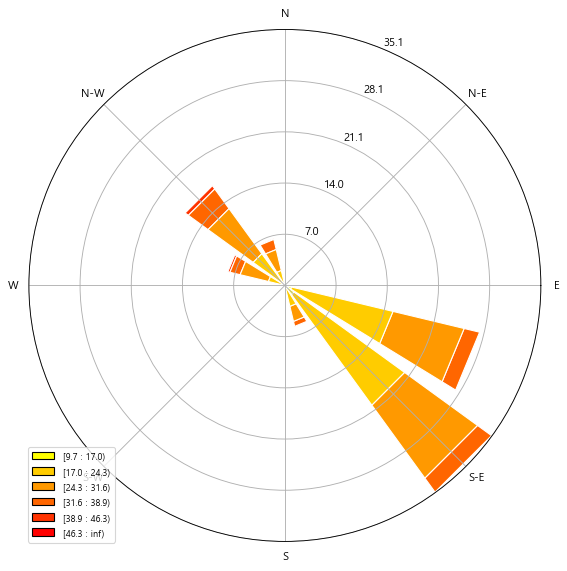

In [17]:
# 윈드로즈 다이어그램으로 시각화
ax = WindroseAxes.from_ax()
ax.bar(windset.wind_direction, windset.HI, normed=True, opening=0.8, edgecolor='white', cmap=cmap_reversed)
ax.set_legend()

- 여름계절풍인 남동풍의 빈도가 현저하게 많지만 열지수가 높은 바람은 주로 북서풍에서 비롯된다.

## 시각화 방법 2. 6~9월로 범위를 제한하여 전체 열지수를 시각화

In [18]:
# 전체 풍향 데이터 중폭염에 영향을 끼치는 6~9월로 범위 제한하여 데이터프레임 저장
mask1 = (pre_wdset['month'] <= 9) & (pre_wdset['month'] >= 6)
junsep = pre_wdset.loc[mask1,:]
junsep.head()

,index,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI,date
4241,2097720,2011,6,1,0,2011-06-01 00:00:00,18.8,0.0,0,72.0,1.4,86.0,4,효목1동,18.615556,64.63264,2011-06-01 00:00:00
4242,2097721,2011,6,1,1,2011-06-01 01:00:00,20.3,0.0,0,68.0,1.6,68.0,4,효목1동,20.161111,66.68496,2011-06-01 01:00:00
4243,2097722,2011,6,1,2,2011-06-01 02:00:00,20.4,0.0,0,67.0,2.2,317.0,4,효목1동,20.245000,66.77432,2011-06-01 02:00:00
4244,2097723,2011,6,1,3,2011-06-01 03:00:00,20.6,0.0,0,67.0,0.4,0.0,4,효목1동,20.465000,67.06898,2011-06-01 03:00:00
4245,2097724,2011,6,1,4,2011-06-01 04:00:00,22.2,0.0,0,64.0,2.4,327.0,4,효목1동,22.146667,69.19592,2011-06-01 04:00:00


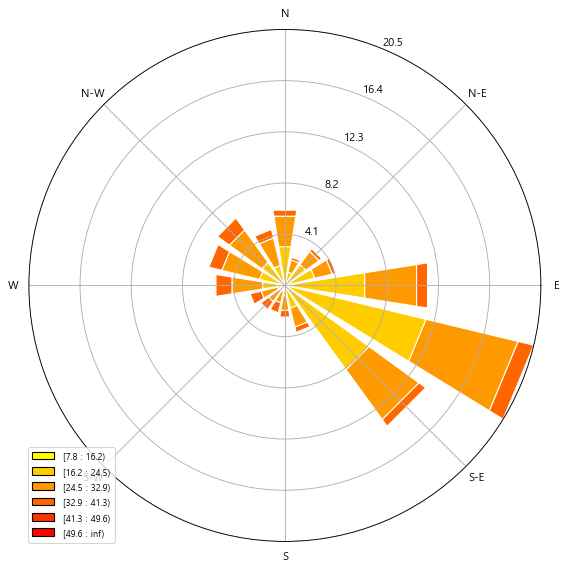

In [19]:
# 윈드로즈 다이어그램으로 시각화
axset = WindroseAxes.from_ax()
axset.bar(junsep.wind_direction, junsep.HI, normed=True, opening=0.8, edgecolor='white', cmap=cmap_reversed)
axset.set_legend()

- 차이가 잘 드러나지 않는다.
- 효과적인 결론 시각화를 위하여 시각화 방법3을 새로 구상함.

## 시각화 방법 3. 열지수 구성비율 그래프

In [20]:
# 풍향과 열지수를 4분위로 구분하기 위하여 데이터를 요약해서 확인
junsep[['wind_direction','HI']].describe()

,wind_direction,HI
count,32208.000000,32208.000000
mean,164.172783,25.694933
std,97.461339,5.701477
min,-1.000000,7.818889
25%,100.000000,21.615556
50%,127.000000,24.902222
75%,262.000000,29.262852
max,360.000000,49.626872


In [ ]:
# 열지수를 4분위로 구간 나누기
bins = list(range(7,50,4))
bins_labels = [str(x)+"미만" for x in bins[1:]]
junsep['HI_bin'] = pd.cut(junsep['HI'], bins, right=False, labels=bins_labels[:])
junsep.head(3)

In [22]:
# 바람방향을 4분위로 구간 나누기
bins = list(range(0,360,10))
bins_labels = [str(x)+"미만" for x in bins[1:]]
junsep['wd_bin'] = pd.cut(junsep['wind_direction'], bins, right=False, labels=bins_labels[:])
junsep.head(3)

C:\Users\User\AppData\Local\Temp\ipykernel_16924\1479703230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junsep['wd_bin'] = pd.cut(junsep['wind_direction'], bins, right=False, labels=bins_labels[:])


,index,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI,date,HI_bin,wd_bin
4241,2097720,2011,6,1,0,2011-06-01 00:00:00,18.8,0.0,0,72.0,1.4,86.0,4,효목1동,18.615556,64.63264,2011-06-01 00:00:00,19미만,90미만
4242,2097721,2011,6,1,1,2011-06-01 01:00:00,20.3,0.0,0,68.0,1.6,68.0,4,효목1동,20.161111,66.68496,2011-06-01 01:00:00,23미만,70미만
4243,2097722,2011,6,1,2,2011-06-01 02:00:00,20.4,0.0,0,67.0,2.2,317.0,4,효목1동,20.245000,66.77432,2011-06-01 02:00:00,23미만,320미만


In [23]:
# 파일로 저장
junsep.to_csv('output\junsep.csv', encoding='cp949')

### 태블로를 이용하여 시각화

In [18]:
import PIL.Image as pilimg

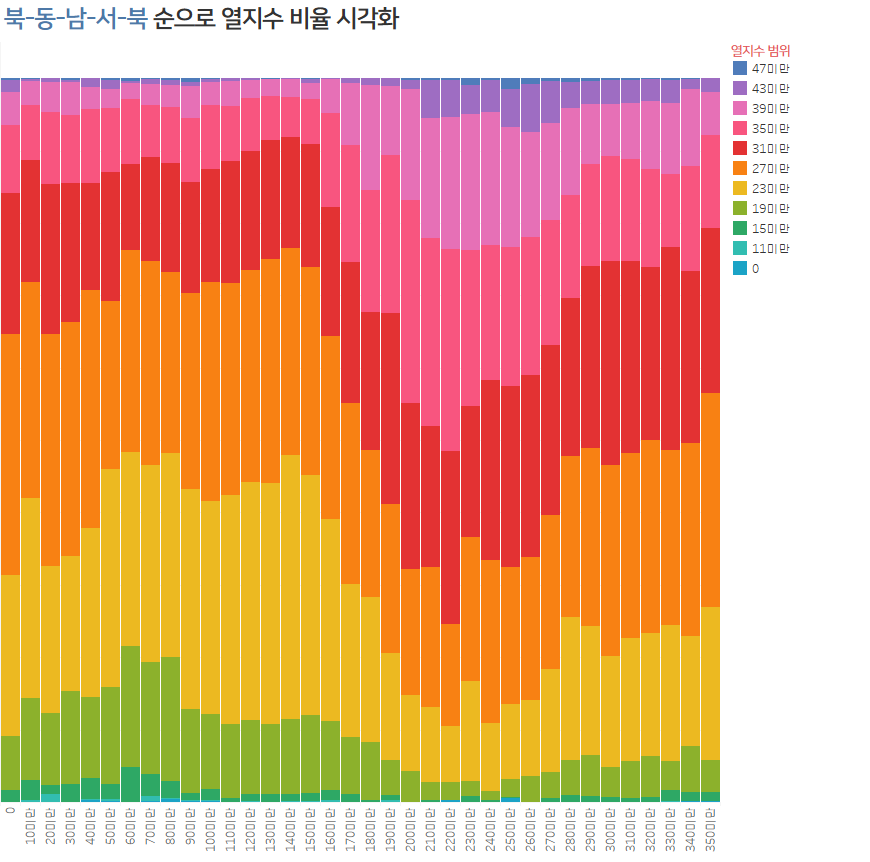

In [20]:
# 이미지 출력
img = pilimg.open("img\WDHI.png")
img

- 6~9월 여름철에 주로 불었던 바람의 방향과 그 때 측정한 열지수의 비율을 나타낸 그래프.
- 가로축: 북쪽에서부터 시계방향으로 풍향을 나타낸 것
- 서쪽(210도~300도)에서 열지수가 가장 높았던 바람의 비율이 증가함을 알 수 있다.
- 즉, 대구의 서쪽에서 불어오는 바람일수록 열지수가 높다는 가설은 타당하다.

----
# (하는 중) 6. 새 가설 : 고도가 낮을수록 열지수가 높다

## - 전처리

In [28]:
# 기상청의 대구 읍면동 측정좌표 데이터를 불러옴
orig_region = pd.read_excel('dataset/daegu_regionXY.xlsx')
orig_region

,1단계,2단계,3단계,격자 X,격자 Y,경도(시),경도(분),경도(초),위도(시),위도(분),위도(초),경도(초/100),위도(초/100)
0,서울특별시,NaN,NaN,60,127,126,58,48.03,37,33,48.85,126.980008,37.563569
1,서울특별시,종로구,NaN,60,127,126,58,53.91,37,34,13.36,126.981642,37.570378
2,서울특별시,종로구,청운효자동,60,127,126,58,14.35,37,35,2.89,126.970652,37.584137
3,서울특별시,종로구,사직동,60,127,126,58,15.44,37,34,23.77,126.970956,37.573269
4,서울특별시,종로구,삼청동,60,127,126,59,2.32,37,34,56.73,126.983978,37.582425
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,제주특별자치도,서귀포시,대천동,52,32,126,28,46.47,33,14,50.91,126.479575,33.247475
3775,제주특별자치도,서귀포시,중문동,51,32,126,26,12.40,33,14,53.44,126.436778,33.248178
3776,제주특별자치도,서귀포시,예래동,50,32,126,23,59.67,33,15,3.69,126.399908,33.251025
3777,이어도,NaN,NaN,28,8,0,0,0.00,0,0,0.00,0.000000,0.000000


In [41]:
# 대구광역시만 선택하고 대구 평균 좌표는 삭제
daegu_loc = orig_region[orig_region['1단계'] == "대구광역시"].reset_index()
daegu_loc = daegu_loc.drop(index = 0, columns=['index', '1단계'])

In [42]:
daegu_loc.head(3)

,2단계,3단계,격자 X,격자 Y,경도(시),경도(분),경도(초),위도(시),위도(분),위도(초),경도(초/100),위도(초/100)
1,중구,NaN,89,90,128,36,30.23,35,51,58.63,128.608397,35.866286
2,중구,동인동,89,91,128,36,32.87,35,52,4.46,128.609131,35.867905
3,중구,삼덕동,89,90,128,36,40.20,35,51,45.27,128.611167,35.862575


In [45]:
# 전체 컬럼명 변경
daegu_loc.columns = ['region2', 'region', 'GridX', 'GridY', 'lng_hour', 'lng_min', 'lng_sec', 'lat_hour', 'lat_min', 'lat_sec', 'lng', 'lat']
daegu_loc.head(3)

,region2,region,GridX,GridY,lng_hour,lng_min,lng_sec,lat_hour,lat_min,lat_sec,lng,lat
1,중구,NaN,89,90,128,36,30.23,35,51,58.63,128.608397,35.866286
2,중구,동인동,89,91,128,36,32.87,35,52,4.46,128.609131,35.867905
3,중구,삼덕동,89,90,128,36,40.20,35,51,45.27,128.611167,35.862575


In [46]:
# 파일로 저장
daegu_loc.to_csv('output\daegu_region_final.csv', encoding='cp949')

---

In [53]:
# 기존 기후 데이터에 읍면동 컬럼을 추가하기 위해 데이터 불러옴
df_region = pd.read_csv('./dataset/daegu/0 REGION.csv')
df_region

,region1,region2,region3
0,대구광역시,중구,동인동
1,대구광역시,중구,삼덕동
2,대구광역시,중구,성내1동
3,대구광역시,중구,성내2동
4,대구광역시,중구,성내3동
...,...,...,...
137,대구광역시,달성군,옥포읍
138,대구광역시,달성군,현풍읍
139,대구광역시,달성군,가창면
140,대구광역시,달성군,하빈면


In [54]:
index_None = df_region[df_region['region1'].isna()].index
df_region.drop(index_None, inplace=True)
df_region.drop('region1', axis=1, inplace=True)
df_region.columns = ['region2','region']
df_region.head(3)

,region2,region
0,중구,동인동
1,중구,삼덕동
2,중구,성내1동


In [58]:
region_final = EDAset.merge(df_region, on='region')

In [59]:
region_final.head(3)

,year,month,day,hour,datetime,temp,rainfall,lightning,humidity,wind_speed,wind_direction,condition,region,HI,DI,date,region2
0,2010,6,1,0,2010-06-01 00:00:00,16.5,0.0,-1,53.0,NaN,NaN,1,동인동,15.589444,60.74355,2010-06-01 00:00:00,중구
1,2010,6,1,1,2010-06-01 01:00:00,18.1,0.0,-1,49.0,NaN,NaN,1,동인동,17.245000,62.73431,2010-06-01 01:00:00,중구
2,2010,6,1,2,2010-06-01 02:00:00,19.7,0.0,-1,46.0,NaN,NaN,1,동인동,18.926667,64.65038,2010-06-01 02:00:00,중구


In [21]:
# 대구 고도 데이터 불러오기
orig_hgt = pd.read_csv('dataset/daegu_height.csv')
orig_hgt

,UTM-K X,UTM-K Y,height,region,WGS84 X,WGS84 Y
0,340087.73,360973.66,40.43,남구,128.550443,35.836146
1,340087.73,360883.66,41.83,남구,128.550428,35.835335
2,340087.73,360793.66,43.90,남구,128.550412,35.834524
3,340087.73,360703.66,45.95,남구,128.550396,35.833713
4,340177.73,361153.66,39.07,남구,128.551471,35.837755
...,...,...,...,...,...,...
132960,346093.02,364554.57,42.04,중구,128.617540,35.867530
132961,346093.02,364464.57,42.11,중구,128.617523,35.866720
132962,346183.02,365004.57,50.75,중구,128.618619,35.871571
132963,346183.02,364914.57,55.92,중구,128.618602,35.870760


#### 1. 대구 기상청 측정좌표에 해당하는 고도 측정지점만 선택하여
#### 2. 그때의 고도와 측정지점 데이터프레임을 만든다
#### 3. 기후 데이터와 조인해서 고도 컬럼을 추가한 뒤
#### 4. 열지수와 상관관계 분석을 실시

In [74]:
region_final.insert(11, 'height', np.nan)

In [64]:
# 1. 대구 기상청 측정좌표와 고도 측정지점이 일치하는 데이터만 선택


daegu_loc.iloc[:,-1] # 위도
daegu_loc.iloc[:,-2] # 경도


1      128.608397
2      128.609131
3      128.611167
4      128.600356
5      128.592622
          ...    
146    128.465978
147    128.449786
148    128.624689
149    128.447711
150    128.415667
Name: lng, Length: 150, dtype: float64